# Problem Set 1. Part II. Quantative Macroeconomics
## Question 3.2

### Adam Wilczynski, Alena Sokolyanskaya

We adjust our previous model. Now half of the agents always have the expectations given by the case described in the previous model:

$\beta_{0g} = \beta_{0b} = 0$ and $ \beta_{1g} = \beta_{1b} = 1$

We updated only for the other 50% of agents.

And we need to compare the welfare of the agents that have the model with the best fit and the agents with the
expectations that are never updated.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("ggplot")
import random



# $$$$$$$$$$$$$$$$$$ Finding the transition matrix for the state $$$$$$$$$$$$$$

# transtion matrix aggregate state
piZ = [ [7/8, 1/8], 
       [1/8, 7/8] ] # because average duration of both good and bad times is eight quarters

A = [[1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0],
     [0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0],
     [0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0],
     [0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1],
     [0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0],
     [0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0],
     [0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0],
     [0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0],
     [1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
     [0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0],
     [0,0,0,0,0,0,0,0,5.6,0,-1,0,0,0,0,0],
     [-1, 0,28/3,0,0,0,0,0,0,0,0,0,0,0,0,0],
     [0.02,0.48,0.05,0.45,0,0,0,0,0,0,0,0,0,0,0,0],
     [0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
     [0,0,0,0,0,0,0,0,0.02,0.48,0.05,0.45,0,0,0,0],
     [0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0]]


b = [7/8,7/8,7/8,7/8,1/8,1/8,1/8,1/8,7/24,21/40,0,0,0.02,0.005,0.05,0.02]

pi_vec = np.dot(np.linalg.inv(A), b)
pize = np.reshape(pi_vec,[4,4], order = 'F')


# $$$$$$$$$$$$$$$$$ parameters $$$$$$$$$$$$$$$$$$$$$$$$$$$$$$

betta=0.95
delta=0.0025
z=[1.01, 0.99]
alfa=0.36
L=[0.96, 0.9]

# $$$$$$$$$$$$$$$$$$ Starting values for V $$$$$$$$$$$$$$$$$$$$$$$    
    
def v1g(k,K):
    return np.log(alfa*z[0]*(K/L[0])**(alfa-1)*k + (1-alfa)*z[0]*(K/L[0])**(alfa)-delta*k)/(1-betta) # c+k' session 2
    
def v1b(k,K):
    return np.log(alfa*z[1]*(K/L[1])**(alfa-1)*k + (1-alfa)*z[1]*(K/L[1])**(alfa)-delta*k)/(1-betta) # c+k' session 2
    
def v0g(k,K):
    return np.log(alfa*z[0]*(K/L[0])**(alfa-1)*k -delta*k)/(1-betta) # c+k' session 2
     
def v0b(k,K):
    return np.log(alfa*z[1]*(K/L[1])**(alfa-1)*k -delta*k)/(1-betta) # c+k' session 2


# $$$$$$$$$$$$$$$$$$ grids $$$$$$$$$$$$$$$$$$$$$$$ 
    
#individual capital
k_grid = np.concatenate((np.linspace(0.1,5,50), np.linspace(5.3,50,150)))

#aggregate capital
x=1
i = 0
K_grid=[]
while x==1:
    K_grid.append(round(16+i*0.04, 2))
    i = i+1
    if 16+i*0.04 >= 18.5:
        x = 0
#K_grid

# $$$$$$$$ Evaluation of the VF

#initialize variables
V1g = [0]*len(k_grid)
V1b = [0]*len(k_grid)
V0g = [0]*len(k_grid)
V0b = [0]*len(k_grid)
V1gt = [0]*len(k_grid)
V1bt = [0]*len(k_grid)
V0gt = [0]*len(k_grid)
V0bt = [0]*len(k_grid)

for i in range(len(k_grid)):
    V1g[i] = [0]*len(K_grid)
    V1b[i] = [0]*len(K_grid)
    V0g[i] = [0]*len(K_grid)
    V0b[i] = [0]*len(K_grid)
    V1gt[i] = [0]*len(K_grid)
    V1bt[i] = [0]*len(K_grid)
    V0gt[i] = [0]*len(K_grid)
    V0bt[i] = [0]*len(K_grid)     

for i in range(len(k_grid)):
    for j in range(len(K_grid)):
        V1g[i][j]= v1g(k_grid[i],K_grid[j])
        V1b[i][j]= v1b(k_grid[i],K_grid[j])
        V0g[i][j]= v0g(k_grid[i],K_grid[j])
        V0b[i][j]= v0b(k_grid[i],K_grid[j])


print("Initial V0g 1 1: ", V0g[10][10])
# $$$$$$$$$$$$$$$$$$$$$ Perceived law of motion  

# initial values 
b0g=0
b1g=1
b0b=0
b1b=1

iter_b = 1
BREAK = 0
while iter_b<10 and BREAK ==0:
    print(iter_b)

    # zi is the index for good shock 
    def H(K,zi):
        return np.exp( (b0g+b1g*np.log(K))*zi+ (b0b+b1b*np.log(K))*(1-zi))
    
    # approximation
    def Ha(K,zi):
        return min(abs(K_grid-H(K,zi)))
    

    # $$$$$$$$$$$$ Solution of the consumer problem
    
    # Consumption for each possible decision
    
    # e=0 unemployed =1 employed
    # g=0 good times  =1 bad times
    
    #consumption
    def c(i,I,e,g):
        vec = np.dot(alfa*z[g]*(K_grid[I]/L[g])**(alfa-1),k_grid)+(1-alfa)*z[g]*(K_grid[I]/L[g])**(alfa)*e+(1-delta)*k_grid[i]- k_grid
        for i in range(len(vec)):
            if vec[i]<0:
                vec[i]=0
        return(vec)
    
    
    def column(matrix, i):
        return [row[i] for row in matrix]
    
    iter = 1
    STOP = 0
    while iter < 15 and STOP == 0:
        i=0
        for i in range(len(k_grid)):
            I = 0
            for I in range(len(K_grid)):
                values = abs(K_grid-H(K_grid[I],1))
                Ip= np.argmin(values)
                V0gt[i][I] = max(np.log(c(i,I,0,0)) + betta*(np.matmul(pize[0],[column(V0g, Ip), column(V1g, Ip), column(V0b,Ip), column(V1b,Ip)])))
                V1gt[i][I] = max(np.log(c(i,I,1,0)) + betta*(np.matmul(pize[1],[column(V0g, Ip), column(V1g, Ip), column(V0b,Ip), column(V1b,Ip)])))
                
                values = abs(K_grid-H(K_grid[I],0))
                Ip= np.argmin(values)
                V0bt[i][I] = max(np.log(c(i,I,0,1)) + betta*(np.matmul(pize[2],[column(V0g, Ip), column(V1g, Ip), column(V0b,Ip), column(V1b,Ip)])))
                V1bt[i][I] = np.nanmax(np.log(c(i,I,1,1)) + betta*(np.matmul(pize[3],[column(V0g, Ip), column(V1g, Ip), column(V0b,Ip), column(V1b,Ip)])))
        
        print("V0g 1 1: ", V0g[10][10])
        print("V0gt 1 1: ", V0gt[10][10])
        #V0g się zmienia a nie powinno!
        
        temp=np.array([abs(np.array(V0gt)-np.array(V0g)),abs(np.array(V1gt)-np.array(V1g)),abs(np.array(V0bt)-np.array(V0b)),abs(np.array(V1bt)-np.array(V1b))])
        dev = temp.max()        
        
        
        for i in range(len(k_grid)):
            for j in range(len(K_grid)):
                V0g[i][j]=V0gt[i][j]
                V1g[i][j]=V1gt[i][j]
                V0b[i][j]=V0bt[i][j]
                V1b[i][j]=V1bt[i][j]           
        
        print("TEST dev: ", dev)
        
        if dev<0.1:
            STOP = 1

        iter = iter + 1
      
    #recover policy function
    a = [0]*len(k_grid)
    for i in range(len(k_grid)):
        a[i]=[0]*len(K_grid)
        for I in range(len(K_grid)):
            a[i][I]=[0]*2
            for x in range(2):
                a[i][I][x] = [0]*2
    
    for i in range(len(k_grid)):
        for I in range(len(K_grid)):
            values = abs(K_grid-H(K_grid[I],1))
            Ip= np.argmin(values)
            
            #0g
            a[i][I][1][0] = np.argmax(np.log(c(i,I,0,0)) + betta*(np.matmul(pize[0],[column(V0g, Ip), column(V1g, Ip), column(V0b,Ip), column(V1b,Ip)])))
            #1g
            a[i][I][0][0] = np.argmax(np.log(c(i,I,1,0)) + betta*(np.matmul(pize[1],[column(V0g, Ip), column(V1g, Ip), column(V0b,Ip), column(V1b,Ip)])))
            
            values = abs(K_grid-H(K_grid[I],0))
            Ip= np.argmin(values)
            #0b
            a[i][I][1][1] = np.argmax(np.log(c(i,I,0,1)) + betta*(np.matmul(pize[2],[column(V0g, Ip), column(V1g, Ip), column(V0b,Ip), column(V1b,Ip)])))
            #1b
            a[i][I][0][1] = np.argmax(np.log(c(i,I,1,1)) + betta*(np.matmul(pize[3],[column(V0g, Ip), column(V1g, Ip), column(V0b,Ip), column(V1b,Ip)])))
    
    
    ar = np.array(a)
    len(K_grid)
    
    
    
    ########## Simulation
    
    
    # A sequence of TFP
    # using the index =0 good ,  =1 bad
    
    if iter_b==1:
        zt = [0]*2000  
        
        zt[0]=0
            
        for t in range(1,2000):
            draw=random.randint(0,100)/100
            zt[t]= int(draw>=piZ[zt[t-1]][0])
        
        sum(zt)/2000
        
        # Splitting the sample for good and bad times
        
        # "burning" the first 200 periods
        ztb=zt
        ztb[0:199]=[1]*200
        
        i_zg = []
        i_zb = []
        
        for t in range(len(zt)):
            if zt[t]==0:
                i_zg.append(t) # index good times 
            else:
                i_zb.append(t) # index bad times           
                
        # initial distribution of assets and employment    
        N_state = [40]*1000
        for i in range(len(N_state)):
            N_state[i] = [0]*2
            for j in range(2):
                N_state[i][j] = [0]*2000
        
        
        for i in range(len(N_state)):
            if i <960:
                for j in range(2):
                    N_state[i][j][0] = (1-j)*40+j*0
            else:
                for j in range(2):
                    N_state[i][j][0] = (1-j)*40+j*1
        
        N_state[10][0][1]
        #np.array(N_state).shape
        
        N_state = np.array(N_state)
        
        # Storage of the sequence of aggregate capital    
        K_ind = [0]*2000
        K_ind[0]=3
        for t in range(1,2000):
            temp_sum = 0
            for n in range(1000):
                # Evolution of assets
                N_state[n][0][t]=a[N_state[n][0][t-1]][K_ind[t-1]][N_state[n][1][t-1]][zt[t-1]]
                # Evolution of the employment status     
                N_state[n][1][t]= 1-((random.randint(0,100)/100)>=pize[1 + zt[t-1]*2 - N_state[n][1][t-1]][zt[t]*2-1]/piZ[zt[t-1]][zt[t]])    
                #N_state = np.array(N_state)
                temp_sum = temp_sum + N_state[n][0][t]
            K_ind[t]=np.argmin(abs(k_grid[int(round(temp_sum/1000))]-K_grid))
         
            
        V0gF= [0]*len(k_grid)
        V1gF= [0]*len(k_grid)
        V0bF= [0]*len(k_grid)
        V1bF= [0]*len(k_grid)
        
        for i in range(len(k_grid)):
            V0gF[i]= [0]*len(K_grid)
            V1gF[i]= [0]*len(K_grid)
            V0bF[i]= [0]*len(K_grid)
            V1bF[i]= [0]*len(K_grid)           
            for j in range(len(K_grid)):
                V0gF[i][j]=V0gt[i][j]
                V1gF[i][j]=V1gt[i][j]
                V0bF[i][j]=V0bt[i][j]
                V1bF[i][j]=V1bt[i][j]
    
    else:
        for t in range(1,2000):
            temp_sum = 0
            for n in range(1000):
                # Evolution of assets
                if n<500:
                    N_state[n][0][t] = N_state[n][0][t-1] #first half that dont update decision
                else:
                    N_state[n][0][t]=a[N_state[n][0][t-1]][K_ind[t-1]][N_state[n][1][t-1]][zt[t-1]]
                # Storage of the sequence of aggregate capital
                temp_sum = temp_sum + N_state[n][0][t]
            K_ind[t]=np.argmin(abs(k_grid[int(round(temp_sum/1000))]-K_grid))

    #$$$$$$$$$$ Regression model for the evolution of aggregate capital
  
    # regression for good times (burning the first 20 periods of g times)
    Yg = [0]*len(i_zg)
    Xg = [0]*len(i_zg)
    for i in range(len(i_zg)):
        Xg[i] = [0]*2
        
    for i in range(20,len(i_zg)):
        Yg[i] = np.log(K_grid[K_ind[i_zg[i]-1]])
        for j in range(2):
            Xg[i][0] = 1
            Xg[i][1] = np.log(K_grid[K_ind[i_zg[i]-2]])
        #Bg[i]
    
    Bg = np.linalg.lstsq(Xg,Yg)
    b0gp=Bg[0][0]
    b1gp=Bg[0][1]
    
    # regression for bad times (burning the first 20 periods of bad times.
    Yb = [0]*len(i_zb)
    Xb = [0]*len(i_zb)
    for i in range(len(i_zb)):
        Xb[i] = [0]*2
        
    for i in range(20,len(i_zb)):
        Yb[i] = np.log(K_grid[K_ind[i_zb[i]-1]])
        for j in range(2):
            Xb[i][0] = 1
            Xb[i][1] = np.log(K_grid[K_ind[i_zb[i]-2]])
        #Bg[i]
    
    Bb = np.linalg.lstsq(Xb,Yb)
    b0bp=Bb[0][0]
    b1bp=Bb[0][1]

    
    dev_b=max([abs(b0g-b0gp), abs(b1g-b1gp), abs(b0b-b0bp), abs(b1b-b1bp)])
    
#    pause(1)
    if dev_b<=0.01:
        BREAK = 1
    
    b0g=0.1*b0gp+0.9*b0g
    b1g=0.1*b1gp+0.9*b1g
    b0b=0.1*b0bp+0.9*b0b
    b1b=0.1*b1bp+0.9*b1b
    
    iter_b = iter_b + 1




#Exercise 2.a and 2.b

# comparison of Value functions
U = np.array(V1g)
F = np.array(V1gF)

#U[:,K_ind[1999]]>F[:,K_ind[1999]]

plt.plot(k_grid, F[:,K_ind[1999]], label='Fixed decision')
plt.plot(k_grid, U[:,K_ind[1999]], label='Updated decision policy')
#plt.xlim([40,50])
#plt.ylim([25,30])
plt.title('welfare for the aggregate capital in the period 2000')
plt.legend()

Initial V0g 1 1:  -55.5195899117203
1


/Users/alena/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:158: RuntimeWarning: divide by zero encountered in log
/Users/alena/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:159: RuntimeWarning: divide by zero encountered in log
/Users/alena/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:163: RuntimeWarning: divide by zero encountered in log
/Users/alena/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:164: RuntimeWarning: divide by zero encountered in log


V0g 1 1:  -55.5195899117203
V0gt 1 1:  -15.797069001831119
TEST dev:  68.60638769222868
V0g 1 1:  -15.797069001831119
V0gt 1 1:  -2.8859945543365564
TEST dev:  25.85162989265231
V0g 1 1:  -2.8859945543365564
V0gt 1 1:  1.8996581697373678
TEST dev:  13.203862546887432
V0g 1 1:  1.8996581697373678
V0gt 1 1:  3.9787251336075573
TEST dev:  6.752336324563686
V0g 1 1:  3.9787251336075573
V0gt 1 1:  5.026571998084437
TEST dev:  3.4890888657864423
V0g 1 1:  5.026571998084437
V0gt 1 1:  5.637199498278074
TEST dev:  1.8397483911800416
V0g 1 1:  5.637199498278074
V0gt 1 1:  6.022694191266683
TEST dev:  1.0032099212581393
V0g 1 1:  6.022694191266683
V0gt 1 1:  6.293062236758493
TEST dev:  0.5773467234145189
V0g 1 1:  6.293062236758493
V0gt 1 1:  6.485244701412982
TEST dev:  0.3561707382969481
V0g 1 1:  6.485244701412982
V0gt 1 1:  6.6313901053624384
TEST dev:  0.23733527094438234
V0g 1 1:  6.6313901053624384
V0gt 1 1:  6.748354955032405
TEST dev:  0.16988072571112278
V0g 1 1:  6.748354955032405
V0

/Users/alena/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:203: RuntimeWarning: divide by zero encountered in log
/Users/alena/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:205: RuntimeWarning: divide by zero encountered in log
/Users/alena/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:210: RuntimeWarning: divide by zero encountered in log
/Users/alena/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:212: RuntimeWarning: divide by zero encountered in log
/Users/alena/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:332: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
/Users/alena/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:349: FutureWarning: `rcond` parameter will change to th

2
V0g 1 1:  7.005487887550738
V0gt 1 1:  7.07087016173525
TEST dev:  0.07591602688568377
3
V0g 1 1:  7.07087016173525
V0gt 1 1:  7.1393254735599445
TEST dev:  0.07126972300596357
4
V0g 1 1:  7.1393254735599445
V0gt 1 1:  7.191915998317162
TEST dev:  0.06860467341482934
5
V0g 1 1:  7.191915998317162
V0gt 1 1:  7.247250871698103
TEST dev:  0.06268088256006621
6
V0g 1 1:  7.247250871698103
V0gt 1 1:  7.2969796670295795
TEST dev:  0.057513458825599884
7
V0g 1 1:  7.2969796670295795
V0gt 1 1:  7.341434297833443
TEST dev:  0.05295135059159506
8
V0g 1 1:  7.341434297833443
V0gt 1 1:  7.381242527508588
TEST dev:  0.047598324129053626
9
V0g 1 1:  7.381242527508588
V0gt 1 1:  7.41709668165624
TEST dev:  0.04591171749953826


#### As we can see when comapring in the last period, the welfare of the agents that have the model with the fixed decision and the agents with the expectations that are never updated: fixed decision policy follows slightly steeper at the lower values of individual capital, whereas for higher valuer of the indidual capital updated decision policy goes above the line of the fixed decision.

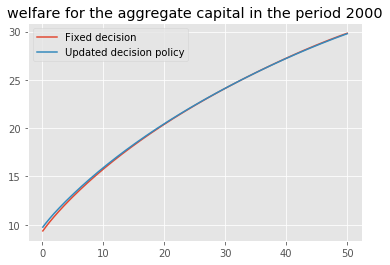

In [2]:
plt.plot(k_grid, F[:,K_ind[1999]], label='Fixed decision')
plt.plot(k_grid, U[:,K_ind[1999]], label='Updated decision policy')
#plt.xlim([40,50])
#plt.ylim([25,30])
plt.title('welfare for the aggregate capital in the period 2000')
plt.legend()

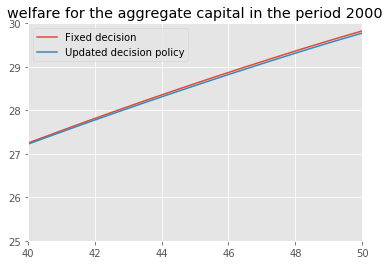

In [4]:
# ZOOM from 40 to 50
plt.plot(k_grid, F[:,K_ind[1999]], label='Fixed decision')
plt.plot(k_grid, U[:,K_ind[1999]], label='Updated decision policy')
plt.xlim([40,50])
plt.ylim([25,30])
plt.title('welfare for the aggregate capital in the period 2000')
plt.legend()

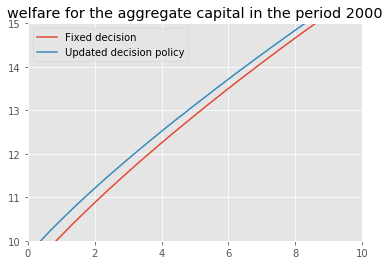

In [7]:
# ZOOM from 40 to 50
plt.plot(k_grid, F[:,K_ind[1999]], label='Fixed decision')
plt.plot(k_grid, U[:,K_ind[1999]], label='Updated decision policy')
plt.xlim([0,10])
plt.ylim([10,15])
plt.title('welfare for the aggregate capital in the period 2000')
plt.legend()